In [1]:
#import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset train and test
train=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')

In [3]:
#Get the first 5 rows of train data
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
#Get the first 5 rows of test data
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


## Data Wrangling

In [5]:
#Checking is there any null value present in the train and test set 
train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [6]:
test.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

In [7]:
#checking the shape of the train  and test set (no. of records, no of features)
train.shape

(32165, 8)

In [8]:
test.shape

(10760, 7)

In [9]:
#Statistical summary of the train set
train.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [10]:
#Getting the info about the features 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null object
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [11]:
#taking the target feature for training the model or we can say that dependent variable 
y = train[["base_score"]]

In [12]:
y.head()

,base_score
0,8.022969
1,7.858458
2,6.341969
3,6.590176
4,6.144782


In [13]:
#removing the column from the train set to make it as input set
del train["base_score"]

In [14]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43


In [15]:
#Taking the features from the train set accoring to the test set that make easy  to train the prediction model
train_data = train[["patient_id","name_of_drug","review_by_patient","drug_approved_by_UIC","number_of_times_prescribed","use_case_for_drug","effectiveness_rating"]]

In [16]:
#To know the data types of each feature of the dataset
train_data.dtypes

patient_id                     int64
name_of_drug                  object
review_by_patient             object
drug_approved_by_UIC          object
number_of_times_prescribed     int64
use_case_for_drug             object
effectiveness_rating           int64
dtype: object

In [17]:
#Encoding the text column values in train and test data set to numeric value 
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()


In [18]:
#Encoding 
X_2 = train_data.apply(ll.fit_transform)
test_encoded = test.apply(ll.fit_transform)
X_2.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,28649,2072,21000,1474,27,335,8
1,13333,923,23254,2213,192,39,7
2,13000,1212,15592,606,17,110,4
3,5042,332,25354,2305,37,412,8
4,21683,436,182,2420,43,105,1


In [19]:
test_encoded.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,7573,854,7164,2058,22,130,9
1,1821,311,813,2640,35,441,8
2,9665,1471,81,2274,13,241,3
3,1051,821,7562,998,21,299,6
4,4427,66,909,442,44,231,1


## Data Visualization

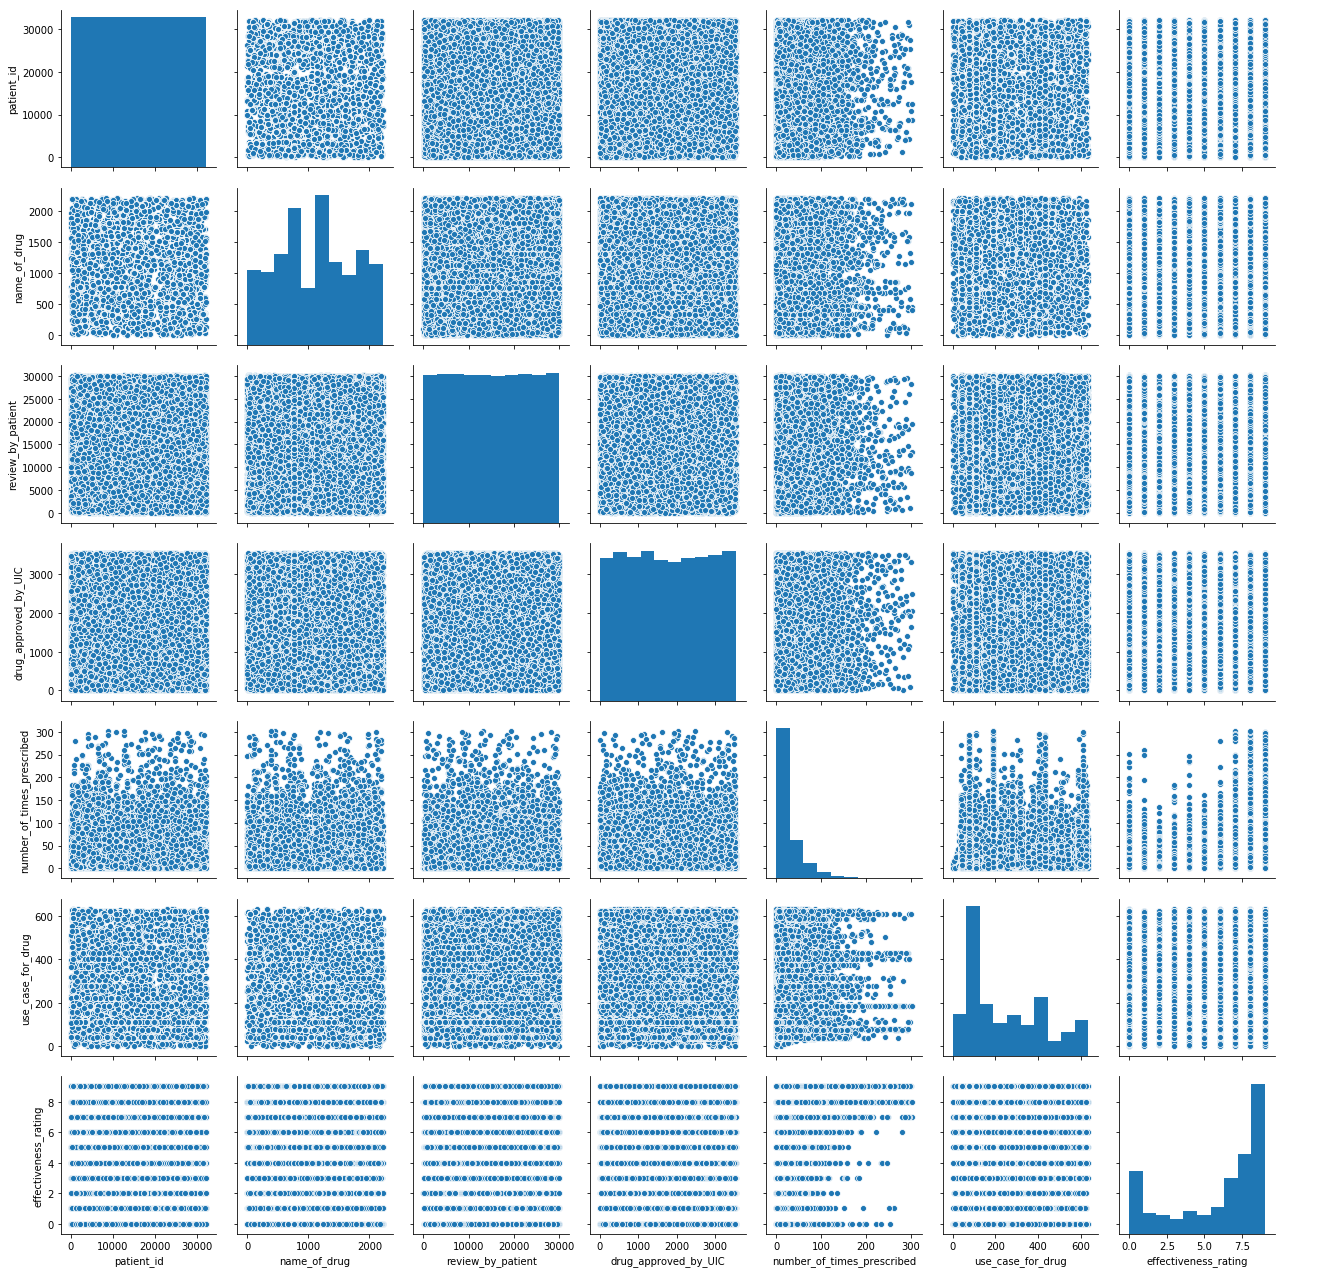

In [62]:
#Ploting the pairplot to the train dataset
sns.pairplot(X_2)

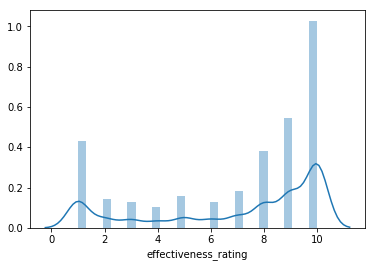

In [56]:
# Ploting the distribution plot on the effectiveness rating to know how it is distributed
sns.distplot(train['effectiveness_rating'])

In [59]:
#to know how the dataset is correlated with other columns
cor=X_2.corr()

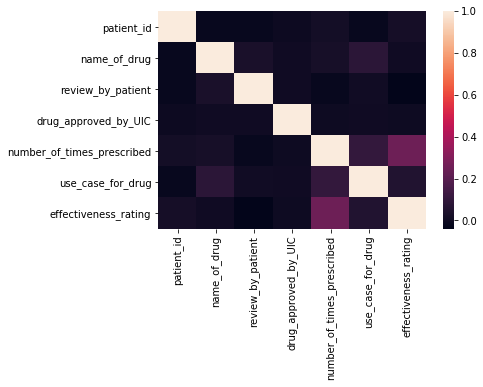

In [60]:
# correlation is presented by heatmeap to understand clearly 
sns.heatmap(cor)

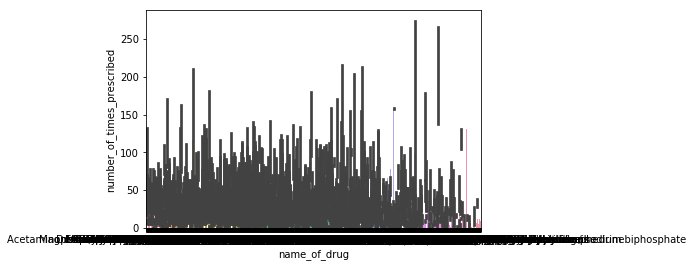

In [72]:
sns.barplot(train['name_of_drug'],train['number_of_times_prescribed'])

## Model Building

In [20]:
#Importing the prediction model from scikit library 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ridge_regression
from sklearn.neural_network import MLPRegressor

In [34]:
#initializing the models
m1 = LinearRegression()
m2 = AdaBoostRegressor()
m3=RandomForestRegressor(max_features='sqrt')
m4 = DecisionTreeRegressor()
#m5=ridge_regression()
m6 = MLPRegressor()


In [83]:
#Builiding  a ANN Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [84]:
model=Sequential()
model.add(Dense(4,kernel_initializer='uniform',activation='relu',input_dim=7))
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='mean_squared_error')

In [88]:
model.fit(X_2,y,batch_size=2,epochs=5)


Train on 32165 samples
Epoch 1/5
32165/32165 [==============================] - 23s 726us/sample - loss: 34.6077
Epoch 2/5
32165/32165 [==============================] - 25s 776us/sample - loss: 34.6077
Epoch 3/5
32165/32165 [==============================] - 19s 602us/sample - loss: 34.6077
Epoch 4/5
32165/32165 [==============================] - 20s 610us/sample - loss: 34.6077
Epoch 5/5
32165/32165 [==============================] - 24s 762us/sample - loss: 34.6077


In [27]:
#fitting the input data to the model or training the data to model
m1.fit(X_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
m2.fit(X_2,y)
m3.fit(X_2,y)
m4.fit(X_2,y)

/home/manendra/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/manendra/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
m6.fit(X_2,y)

/home/manendra/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
#making predicton on the test set 
pred1 = m1.predict(test_encoded)

In [31]:
pred2 = m2.predict(test_encoded)

In [36]:
pred3 = m3.predict(test_encoded)

In [33]:
pred4 = m4.predict(test_encoded)

In [24]:
mlp=m6.predict(test_encoded)

[array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32)]

In [34]:
pred1

array([[7.25620384],
       [7.05271222],
       [6.06823322],
       ...,
       [7.28887258],
       [6.82896705],
       [7.05349983]])

In [35]:
pred2

array([7.49258783, 7.49258783, 6.81838585, ..., 7.49258783, 6.46261855,
       7.49258783])

In [36]:
pred3

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [38]:
pred4

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [42]:
pred4

[array([8.76, 8.75, 5.95, ..., 6.79, 5.31, 8.19])]

In [43]:
#making predicted value like submission sample value
pred2=[pred2.round(2)]

In [37]:
#making predicted value like submission sample value
pred3=[pred3.round(2)]

In [74]:
#making predicted value like submission sample value
pred1=[pred1.round(2)]

In [90]:
ann=[ann.round(2)]

In [91]:
ann

[array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32)]

In [48]:
len(pred4[0])

10760

In [49]:
test.shape

(10760, 7)

In [38]:
#of pred3
#making a DataFrame for submission file to store the result 
submission = pd.DataFrame()
submission['patient_id'] = test['patient_id']
submission['base_score'] = pred3[0] # our model predictions on the test dataset
#submission.head()
submission.to_csv('submission2.csv', index=False)
print('Saved the submission file')

Saved the submission file


In [79]:
result = pd.read_csv('submission.csv')
result

,patient_id,base_score
0,163740,8.76
1,39293,8.75
2,208087,5.95
3,23295,5.99
4,97013,6.14
5,213376,7.48
6,79865,8.36
7,27607,6.13
8,60341,2.23
9,141462,6.49


### Successfully done the data analysis on the given data set.
## Now it's time to submit the file
### Happy Learning !